# 1- **Import Libraries**

In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

# 2- **Data Exploration**

In [2]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [3]:
df.shape

(200, 5)

In [4]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### - Since the `CustomerID` column is not relevant nor necessary we are going to drop it

In [6]:
df = df.drop(columns=["CustomerID"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


# 3- **Check for Null Values and Duplicates**

In [8]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
if df.duplicated().sum() == 0:
    print("There are no duplicates")
else:
    print(df.duplicated().sum())

There are no duplicates


In [10]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# 4- **Data Visualization**

## 1- Gender 

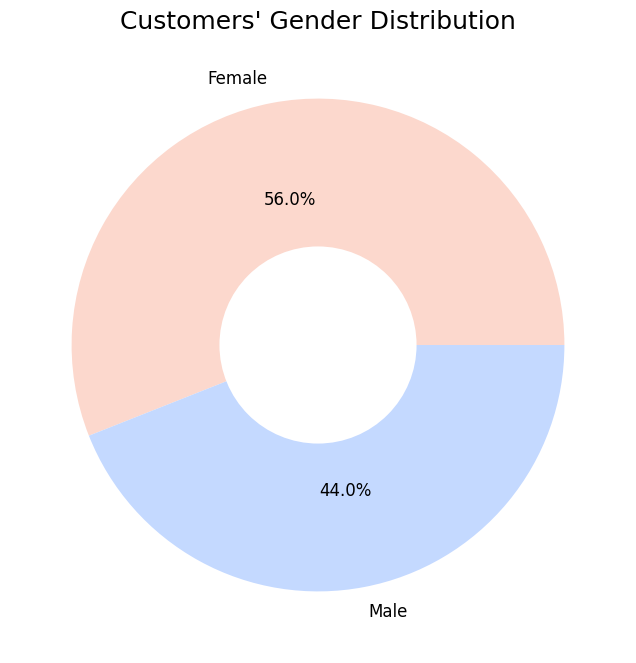

In [11]:
colors = ["#FCD8CD", "#C4D9FF"]

plt.figure(figsize=(12, 8))
gender_count = df["Gender"].value_counts()
plt.pie(gender_count, labels = gender_count.index,
        autopct='%1.1f%%', colors=colors, textprops={'fontsize':12})
centre_circle = plt.Circle((0,0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Customers' Gender Distribution", fontsize=18)
plt.show()

## 2- Age

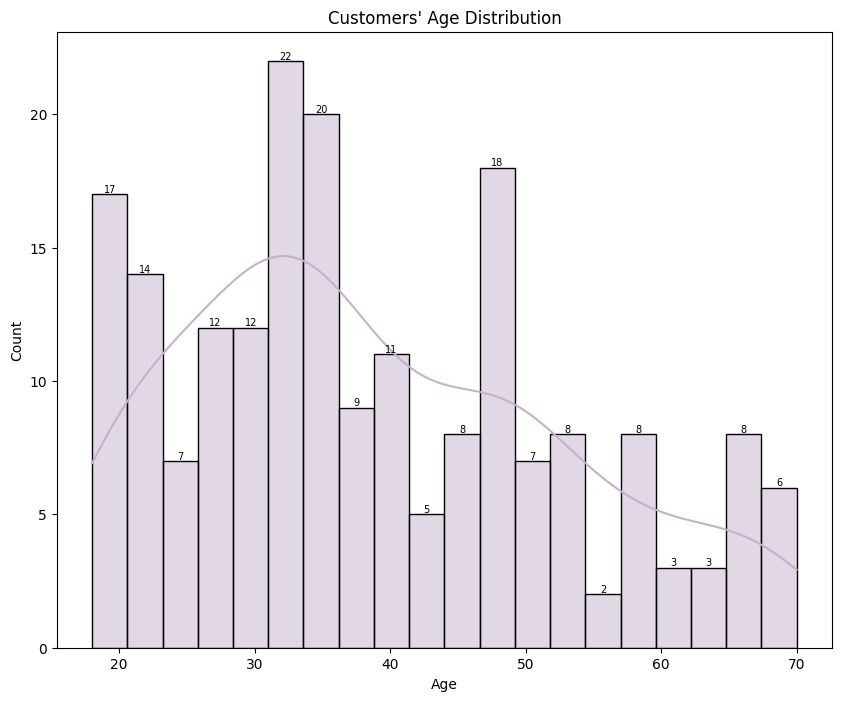

In [12]:
color = "#C5B0CD"
plt.figure(figsize=(10, 8))
ax = sns.histplot(x=df["Age"], data=df, color=color, kde="True", bins=20)
plt.xlabel("Age")
plt.ylabel("Count")    
plt.title("Customers' Age Distribution")
for container in ax.containers:
    ax.bar_label(container, fontsize=7)
plt.show()

## 3- Annual Income

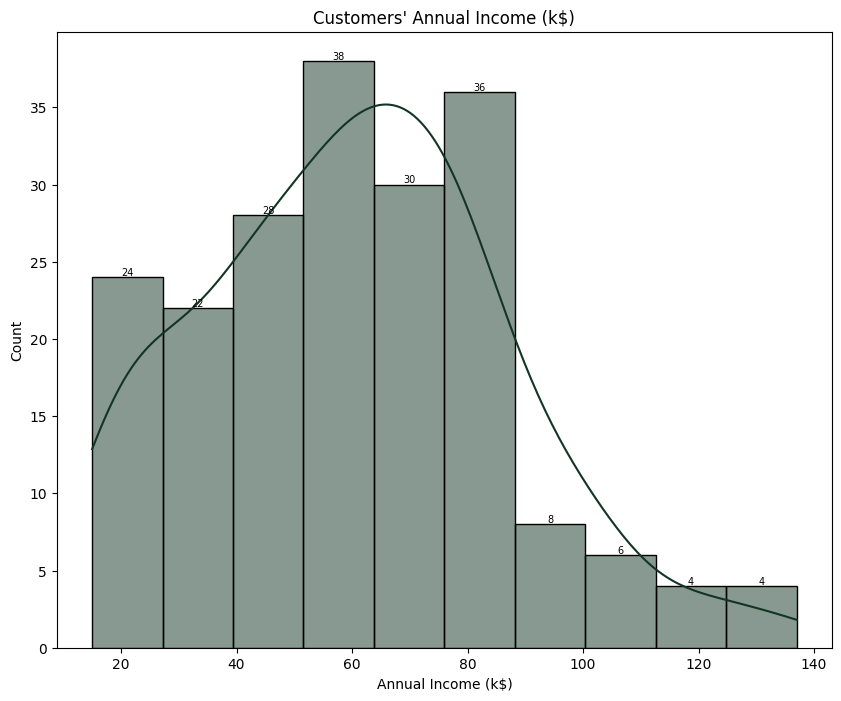

In [13]:
color = "#123524"
plt.figure(figsize=(10, 8))
ax = sns.histplot(x=df["Annual Income (k$)"], data=df, color=color, kde="True", bins=10)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Count")    
plt.title("Customers' Annual Income (k$)")
for container in ax.containers:
    ax.bar_label(container, fontsize=7)
plt.show()

## 4- Spending Score

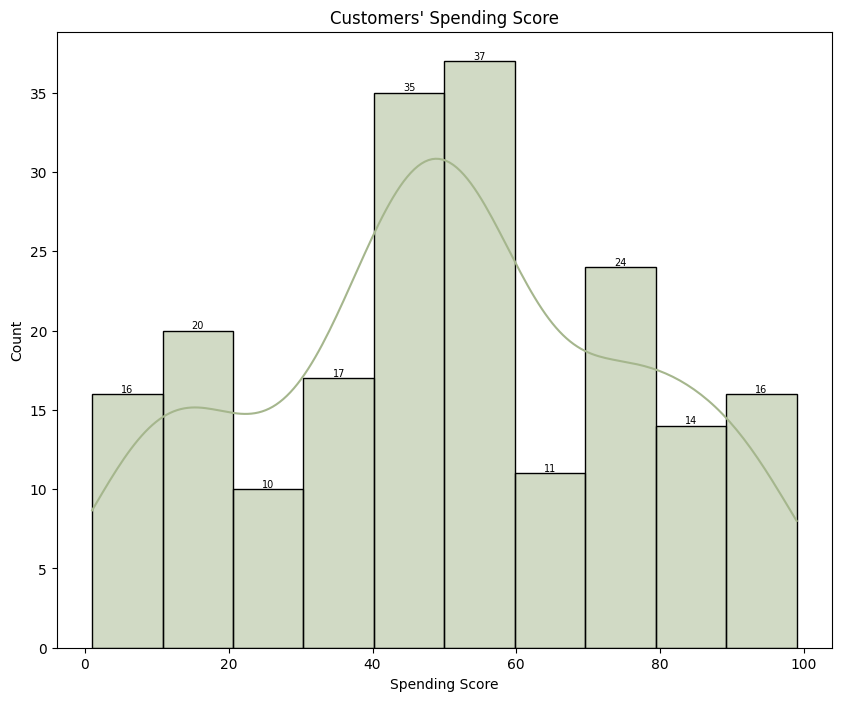

In [14]:
color = "#A5B68D"
plt.figure(figsize=(10, 8))
ax = sns.histplot(x=df["Spending Score (1-100)"], data=df, color=color, kde="True", bins=10)
plt.xlabel("Spending Score")
plt.ylabel("Count")    
plt.title("Customers' Spending Score")
for container in ax.containers:
    ax.bar_label(container, fontsize=7)
plt.show()

## 5- Pair plot for features by Gender

<Figure size 2000x1000 with 0 Axes>

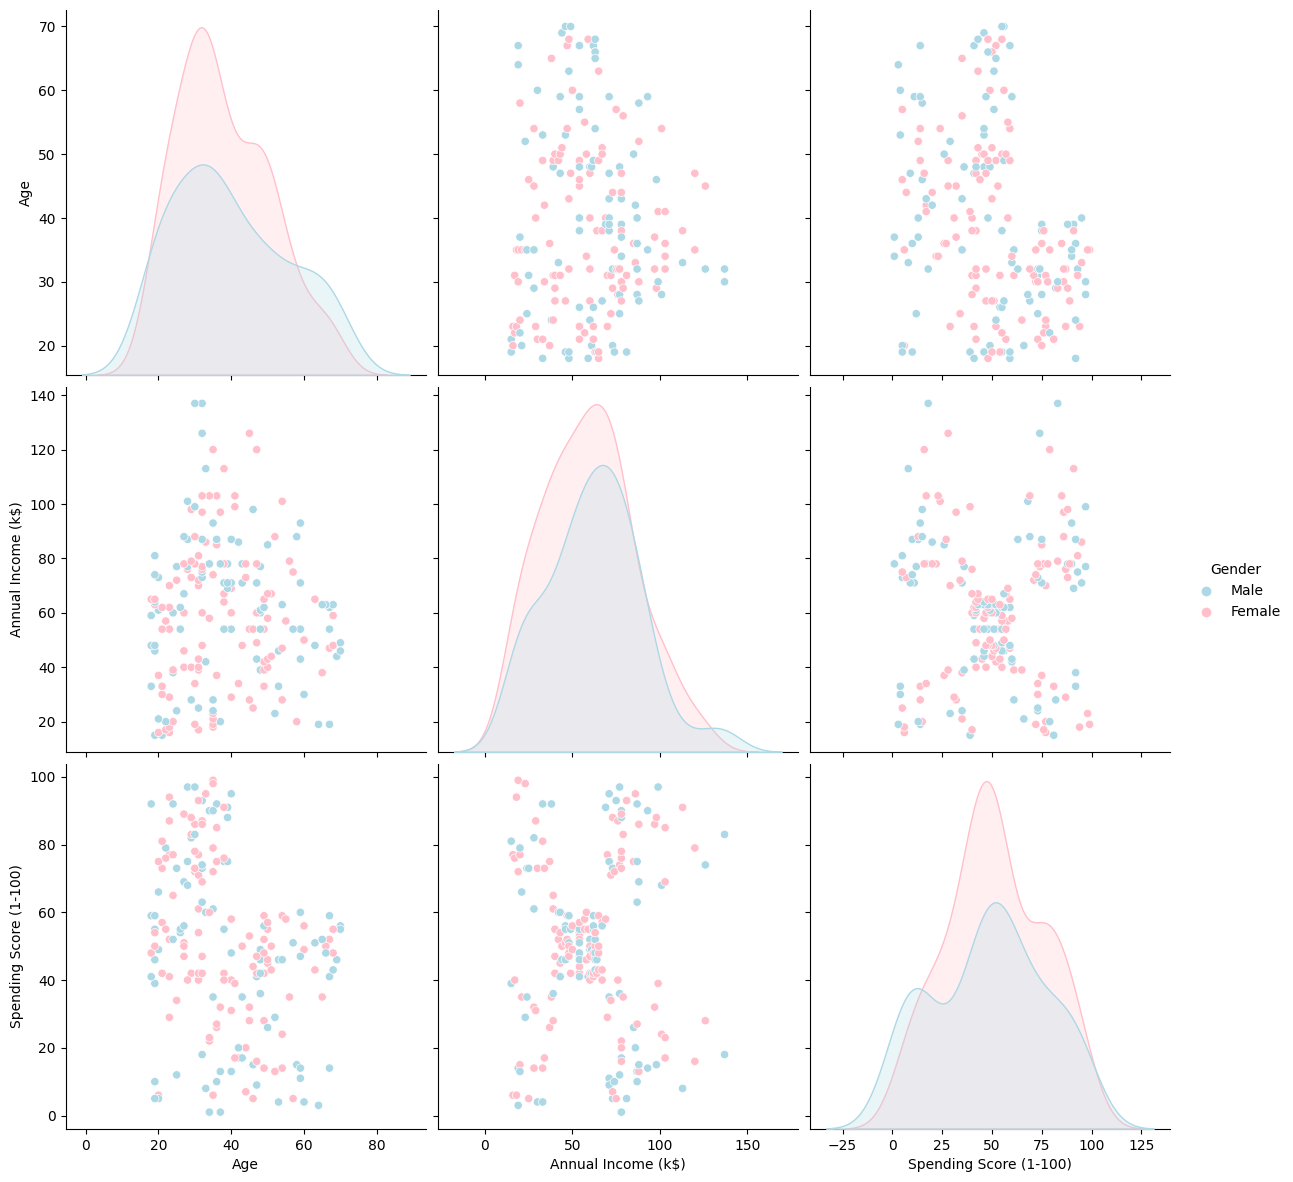

In [15]:
plt.figure(figsize=(20, 10))
sns.pairplot(df, hue="Gender", height = 4, palette = {"Male":"lightblue", "Female":"pink"})
plt.show()

## 6- Box Plots for features by Gender vs. Features

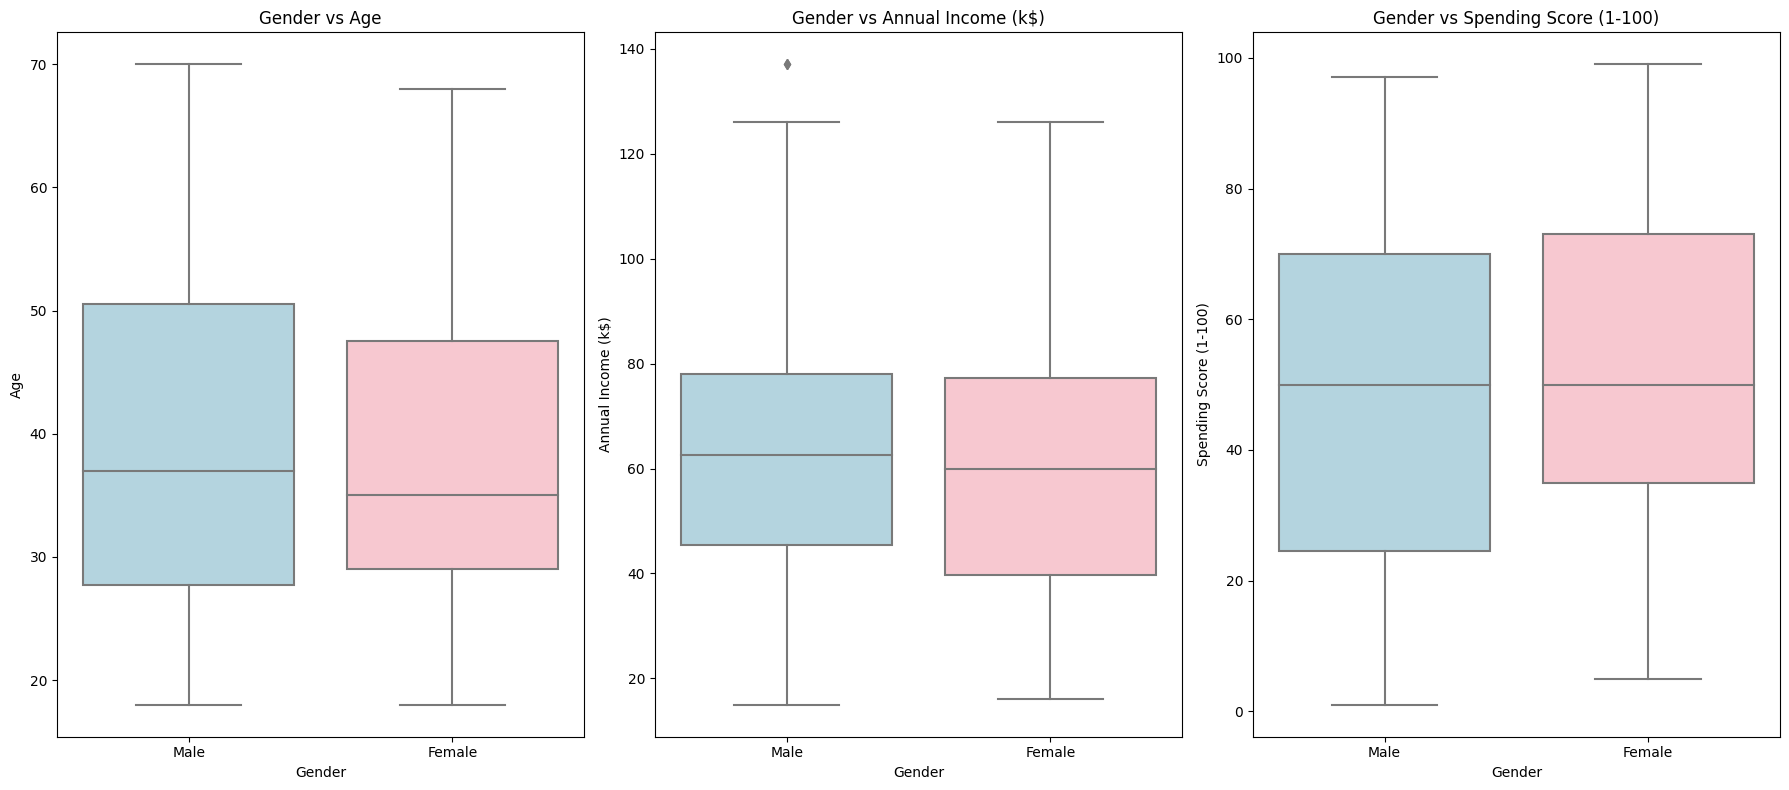

In [16]:
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

fig, axes = plt.subplots(1, 3, figsize=(18, 8))

for i, feature in enumerate(features):
    sns.boxplot(x="Gender", y=feature, data=df, ax=axes[i], palette={"Male":"lightblue", "Female":"pink"})
    axes[i].set_title(f"Gender vs {feature}")

plt.tight_layout()
plt.show()

# 7- **Feature Scaling**

In [17]:
scaler = StandardScaler()

X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
Xscaled = scaler.fit_transform(X)

# 8- **The Elbow Method**

In [18]:
inertia = []
for k in range(1, 11):
    kmeans=KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Xscaled)
    inertia.append(kmeans.inertia_)

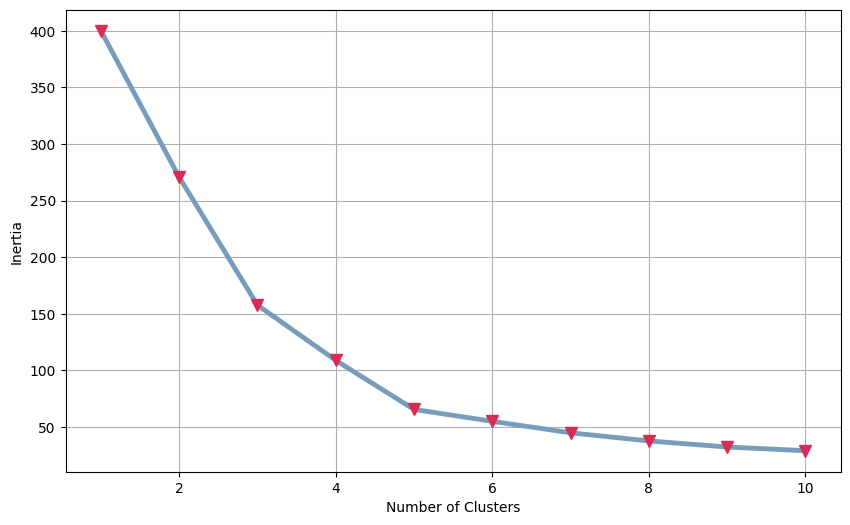

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, color="#789DBC", marker="v",
        markerfacecolor="#D92C54", markeredgecolor="#D92C54", 
        linewidth=3.5, markersize=8)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()

#### - As shown in the previous graph, the best number of clusters is ***5***

In [20]:
kmeans = KMeans(n_clusters=5, random_state=42)
clstrs = kmeans.fit_predict(Xscaled)

#### Now we will add a column called `Clusters` to the dataframe to use it for cluter visualization

In [21]:
df["Clusters"] = clstrs

In [22]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


# 9- **Clusters Visualization using Scatter Plot**

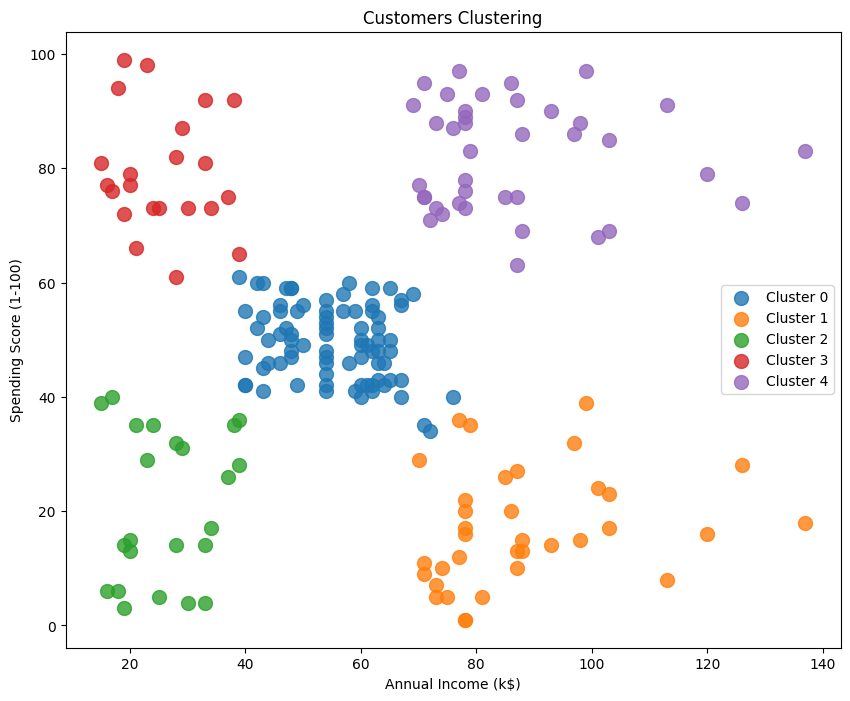

In [23]:
plt.figure(figsize=(10, 8))

for i in range(5):
    cluster_data = df[df["Clusters"] == i]
    plt.scatter(
        x=cluster_data["Annual Income (k$)"], 
        y=cluster_data["Spending Score (1-100)"],
        s=100, alpha=0.8, label=f'Cluster {i}'
    )


plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customers Clustering")
plt.legend(loc="center right")
plt.show()


# **BONUS WORK**

# 1- **DBSCAN Clustering**

In [24]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values
dbscan = DBSCAN(eps=10, min_samples=5)
labels = dbscan.fit_predict(X)

#### We will add a column called `DBSCAN Clusters` to the dataframe to use it for visualization

In [25]:
df["DBSCAN Clusters"] = labels

In [26]:
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters,DBSCAN Clusters
0,Male,19,15,39,2,0
1,Male,21,15,81,3,0
2,Female,20,16,6,2,1
3,Female,23,16,77,3,0
4,Female,31,17,40,2,0


# 2- **DBSCAN Clusters Visualization**

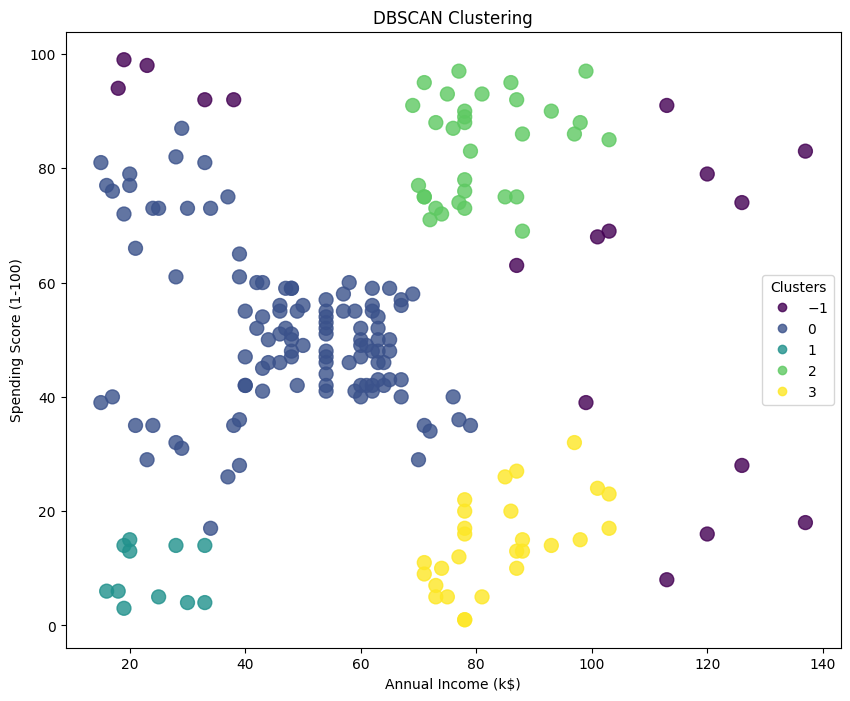

In [27]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    df["Annual Income (k$)"], df["Spending Score (1-100)"],
    c=df["DBSCAN Clusters"], cmap="viridis", s=100, alpha=0.8,
    )

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("DBSCAN Clustering")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


#### As shown in the DBSCAN Clustering scatter plot, some values belong to the `-1` cluster, which indicates that these values are noise

# 3- **DBSCAN Clustering Visualization, highlighting the noise values**

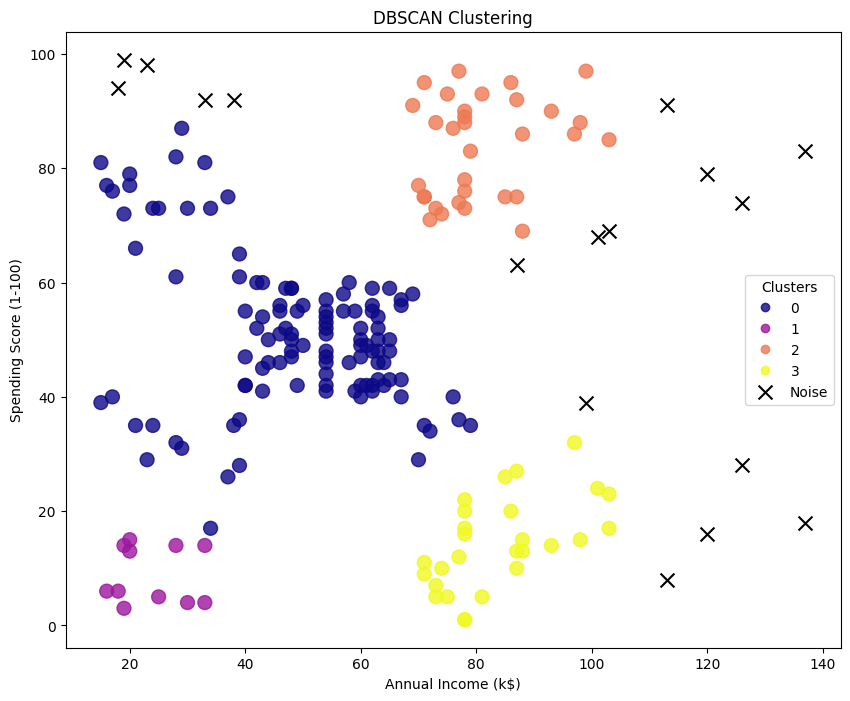

In [28]:
plt.figure(figsize=(10, 8))

mask = df["DBSCAN Clusters"] != -1
scatter_clusters = plt.scatter(
    df.loc[mask, "Annual Income (k$)"],
    df.loc[mask, "Spending Score (1-100)"],
    c=df.loc[mask, "DBSCAN Clusters"], cmap="plasma",
    s=100, alpha=0.8
)

mask_noise = df["DBSCAN Clusters"] == -1
scatter_noise = plt.scatter(
    df.loc[mask_noise, "Annual Income (k$)"],
    df.loc[mask_noise, "Spending Score (1-100)"],
    c="k", marker="x", s=100, label="Noise"
)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("DBSCAN Clustering")

handles, labels = scatter_clusters.legend_elements()
plt.legend(handles + [scatter_noise], labels + ["Noise"], title="Clusters")

plt.show()


# 4- **Average Spending analysis per cluster**

In [29]:
cluster_summary = (df.groupby("Clusters")[["Annual Income (k$)", "Spending Score (1-100)"]].mean().round(2).reset_index())
cluster_summary

,Clusters,Annual Income (k$),Spending Score (1-100)
0,0,55.30,49.52
1,1,88.20,17.11
2,2,26.30,20.91
3,3,25.73,79.36
4,4,86.54,82.13


#### - **Cluster 0**: Customers with *Average Annual Income* and *Average Spending Score*
#### - **Cluster 1**: Customers with *High Annual Income* and *Low Spending Score*
#### - **Cluster 2**: Customers with *Low Annual Income* and *Low Spending Score*
#### - **Cluster 3**: Customers with *Low Annual Income* and *High Spending Score*
#### - **Cluster 4**: Customers with *High Annual Income* and *High Spending Score*